In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('data_churn_cluster.csv',index_col=0)

In [35]:
data

,City,Gender,SeniorCitizen,Dependents,TenureMonths,MonthlyCharges,TotalCharges,CLTV,Age,Under30,...,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,InternetType_1,InternetType_2,InternetType_3,InternetType_4,label
0,562,1,0,0,2,53.85,108.15,3239,37,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
1,562,0,0,1,2,70.70,151.65,2701,19,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,562,0,0,1,8,99.65,820.50,5372,31,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,562,0,0,1,28,104.80,3046.05,5003,23,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4,562,1,0,1,49,103.70,5036.30,5340,38,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,736,1,0,0,12,59.80,727.80,4581,44,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
1865,920,0,0,0,9,44.20,403.35,2029,40,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1866,1058,1,1,0,1,75.75,75.75,5571,79,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1867,1091,0,0,0,67,102.95,6886.25,5620,28,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [36]:
offers = data[['Offer_1','Offer_2','Offer_3','Offer_4','Offer_5','Offer_6']]

In [37]:
data['Offer'] = offers.idxmax(axis=1)

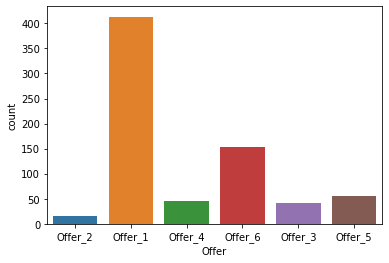

In [38]:
ax = sns.countplot(x="Offer", data=data[data['label']==0])

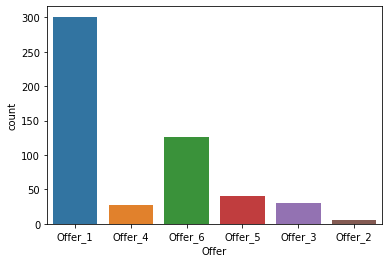

In [39]:
ax = sns.countplot(x="Offer", data=data[data['label']==1])

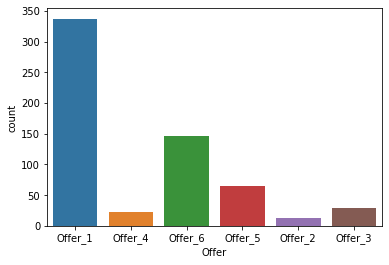

In [40]:
ax = sns.countplot(x="Offer", data=data[data['label']==2])

In [26]:
data2 = pd.read_csv('data_nochurn_cluster.csv',index_col=0)

In [27]:
offers2 = data2[['Offer_1','Offer_2','Offer_3','Offer_4','Offer_5','Offer_6']]
data2['Offer'] = offers2.idxmax(axis=1)

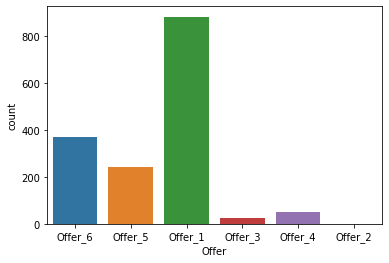

In [30]:
ax = sns.countplot(x="Offer", data=data2[data2['label']==0])

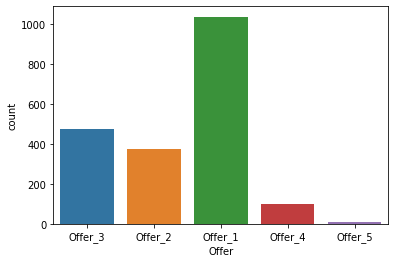

In [31]:
ax = sns.countplot(x="Offer", data=data2[data2['label']==1])

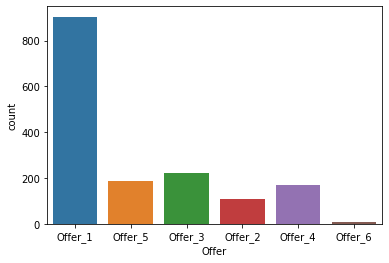

In [32]:
ax = sns.countplot(x="Offer", data=data2[data2['label']==2])

Each cluster: design an offer
Cost analysis:
"Right" classification: cost & benefits

https://wp.nyu.edu/adityakapoor/2017/02/17/churn-in-the-telecom-industry-identifying-customers-likely-to-churn-and-how-to-retain-them/

Customer LTV, etc...

Run optimization models:\
For each cluster, run an optimization model (with cost condition, benefit condition:
eg. if one cluster is basically because of high price: price drop offer (10%, 15%, ...) (length, 3 months, 5 months ...)\
one cluster is for data (data limit increase, 1G, 2G, etc)\
Just write generic functions, say with actual input of cost and benefit ...

In [ ]:
function assign_offer(df,week,year,var_th)
    model = Model(solver = GurobiSolver(OutputFlag=0))
    # Variables
    @variable(model,z[i=1:size(df)[1]],Bin)
    
    # Constraints
    @constraint(model,sum(z[i]*df[i,:DKSalary] for i=1:num_players) <= 50000)
    @constraint(model,[i=1:num_players], z[i]*df[i,var_week] <= var_th)
    
    # Objective
    @objective(model,Max, sum(z[i]*df[i,obj] for i=1:num_players))

    # Optimize
    solve(model)
    selected_players = getvalue(z)
    result = hcat(df, selected_players) ;
    selected_players = result[result.x1 .==1,[:Pos, :PlayerID, :DKSalary, obj,:DKP]]
    return selected_players
end 